In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier  

In [2]:
data = pd.read_csv('M30_EURUSD.csv')
data.head()

C:\Users\ihkar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (5,6,8,9,10,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,46,47,48,49,50,51,55,56,58,59,61,62,64,65,67,68,70,71,73,74,76,77,79,80,82,83,85,86,88,90,92,94,96,98,100,102,104,106,108,110,112,114,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,139,140,142,143,145,146,147,148,149,150,151,152,153,154,155,156,158,160,162,164,166,168,170,172,174,176,178,179,180,181,183,185,186,188,189,191,192,194,195,197,198,200,201,203,204,206,207,209,210,212,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,30

,time,open,high,low,close,ind_5,ind_6,ind_7,ind_8,ind_9,...,80_signal,90_signal,100_signal,120_signal,140_signal,160_signal,180_signal,200_signal,220_signal,240_signal
0,2017.06.26 04:00,1.11894,1.11959,1.11894,1.11942,?,?,?,?,?,...,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY
1,2017.06.26 04:30,1.11943,1.11960,1.11913,1.11942,?,?,?,?,?,...,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY
2,2017.06.26 05:00,1.11940,1.11943,1.11891,1.11922,?,?,?,?,?,...,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY
3,2017.06.26 05:30,1.11924,1.11968,1.11919,1.11957,?,?,?,?,?,...,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY
4,2017.06.26 06:00,1.11955,1.11955,1.11914,1.11926,?,?,?,?,?,...,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY


In [3]:
data.shape

(27994, 445)

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
open,27994.0,1.160802,0.037343,1.09109,1.131480,1.158085,1.181198,1.25479
high,27994.0,1.161279,0.037419,1.09154,1.131930,1.158640,1.181680,1.25544
low,27994.0,1.160327,0.037273,1.09037,1.131040,1.157510,1.180640,1.25432
close,27994.0,1.160803,0.037345,1.09108,1.131472,1.158120,1.181200,1.25479
ind_52,27994.0,0.016825,7.109955,-63.00000,-3.000000,0.000000,3.000000,91.00000
ind_53,27994.0,-0.033364,13.845746,-149.00000,-9.000000,2.000000,9.000000,142.00000
ind_417,27994.0,23.159641,21.450603,0.00000,8.000000,17.000000,31.000000,282.00000
ind_418,27994.0,-23.060549,20.716090,-188.00000,-31.000000,-17.000000,-9.000000,0.00000
ind_419,27994.0,46.214224,25.330794,6.00000,28.000000,41.000000,59.000000,287.00000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27994 entries, 0 to 27993
Columns: 445 entries, time to 240_signal
dtypes: float64(4), int64(5), object(436)
memory usage: 95.0+ MB


In [6]:
# soru işaretleri olan satırlar veriden silindi. Satırlardaki soru işaretleri saydırılarak çok fazla olanlara atılabilir.
data = data.replace("?", np.nan)
data = data.dropna()
data.head()

,time,open,high,low,close,ind_5,ind_6,ind_7,ind_8,ind_9,...,80_signal,90_signal,100_signal,120_signal,140_signal,160_signal,180_signal,200_signal,220_signal,240_signal
2001,2017.08.22 20:30,1.17502,1.17538,1.17478,1.17505,-20,-19,NONE,7.142857142857143,92.85714285714286,...,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY
2002,2017.08.22 21:00,1.17505,1.17531,1.17492,1.17500,-20,-20,NONE,0.0,85.71428571428571,...,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY
2003,2017.08.22 21:30,1.17496,1.17599,1.17487,1.17583,-19,-20,BUY,35.714285714285715,78.57142857142857,...,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY
2004,2017.08.22 22:00,1.17582,1.17627,1.17565,1.17600,-17,-19,NONE,28.571428571428573,71.42857142857143,...,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY
2005,2017.08.22 22:30,1.17600,1.17630,1.17595,1.17603,-13,-17,NONE,21.428571428571427,64.28571428571429,...,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY,BUY


In [7]:
(data['open'] > data['high']).value_counts()

False    19901
dtype: int64

In [8]:
col_num = data.shape[1]

In [32]:
data_result = data.iloc[:,(col_num-15):col_num]
data_init = data.iloc[:,0:5]
data_1 = data.iloc[:,5:30]
data_2 = data.iloc[:,30:55]
data_3 = data.iloc[:,55:80]
data_4 = data.iloc[:,80:105]
data_5 = data.iloc[:,105:130]
data_6 = data.iloc[:,130:155]
data_7 = data.iloc[:,155:180]
data_8 = data.iloc[:,180:205]
data_9 =  data.iloc[:,205:230]
data_10 = data.iloc[:,230:255]
data_11 = data.iloc[:,255:280]
data_12 = data.iloc[:,280:305]
data_13 = data.iloc[:,305:330]
data_14 = data.iloc[:,330:355]
data_15 = data.iloc[:,355:380]
data_16 = data.iloc[:,380:405]
data_17 = data.iloc[:,405:430]

In [10]:
data['30_signal'].value_counts()

SELL    9843
BUY     9597
NONE     461
Name: 30_signal, dtype: int64

In [12]:
data.drop(index = data[data['30_signal']=='NONE'].index, inplace = True)
# data_result.drop(index = data_result[data_result['30_signal']=='NONE'].index, inplace = True)

In [13]:
df = data.iloc[:,1:430]
df.shape

(19440, 429)

In [14]:
cat_column_names = ['ind_7','ind_11','ind_24','ind_38','ind_54','ind_57','ind_60','ind_63','ind_66','ind_69','ind_72','ind_75',
                    'ind_78','ind_81','ind_84','ind_87','ind_89','ind_91','ind_93','ind_95','ind_97','ind_99','ind_101',
                    'ind_103','ind_105','ind_107','ind_109', 'ind_111', 'ind_113', 'ind_115','ind_138','ind_141','ind_144',
                    'ind_157','ind_159','ind_161','ind_163','ind_165','ind_167','ind_169','ind_171','ind_173','ind_175',
                    'ind_177','ind_182','ind_184','ind_187','ind_190','ind_193','ind_196','ind_199','ind_202','ind_205',
                    'ind_208','ind_211','ind_213','ind_384','ind_386','ind_388','ind_390']

In [15]:
# categorical kolonların dummy var. oalrak değiştirilmesi
dms = pd.get_dummies(df[cat_column_names])
dms_none_cols = dms.filter(regex = '_NONE').columns
for i in dms_none_cols:
    dms.drop(i,axis=1,inplace=True)
dms_red_cols = dms.filter(regex = '_RED').columns
for i in dms_red_cols:
    dms.drop(i,axis=1,inplace=True)

dms.head()

,ind_7_BUY,ind_7_SELL,ind_11_BUY,ind_11_SELL,ind_24_BUY,ind_24_SELL,ind_38_BUY,ind_38_SELL,ind_54_BUY,ind_54_SELL,...,ind_211_BUY,ind_211_SELL,ind_384_BUY,ind_384_SELL,ind_386_BUY,ind_386_SELL,ind_388_BUY,ind_388_SELL,ind_390_BUY,ind_390_SELL
2001,0,0,0,1,1,0,1,0,0,1,...,0,1,0,1,0,0,0,1,0,1
2002,0,0,0,1,1,0,1,0,0,1,...,0,1,0,1,0,0,0,1,0,1
2003,1,0,0,1,1,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,1
2004,0,0,0,1,1,0,1,0,1,0,...,0,0,0,1,1,0,1,0,0,1
2005,0,0,0,1,1,0,1,0,1,0,...,0,0,0,1,1,0,1,0,0,1


In [16]:
df = df.drop(cat_column_names,axis=1).astype("float64")
df.head()

,open,high,low,close,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,...,ind_420,ind_421,ind_422,ind_423,ind_424,ind_425,ind_426,ind_427,ind_428,ind_429
2001,1.17502,1.17538,1.17478,1.17505,-20.0,-19.0,7.142857,92.857143,-85.714286,35.726149,...,73.0,-79.0,-99.0,202.0,0.290323,0.120805,0.537500,0.510815,0.320588,0.359703
2002,1.17505,1.17531,1.17492,1.17500,-20.0,-20.0,0.000000,85.714286,-85.714286,35.416025,...,74.0,-78.0,-99.0,203.0,1.000000,0.129496,0.560261,0.452514,0.312500,0.360372
2003,1.17496,1.17599,1.17487,1.17583,-19.0,-20.0,35.714286,78.571429,-42.857143,44.091954,...,65.0,-87.0,-107.0,195.0,0.931507,0.593103,0.533333,0.476357,0.344390,0.369380
2004,1.17582,1.17627,1.17565,1.17600,-17.0,-19.0,28.571429,71.428571,-42.857143,45.700892,...,64.0,-88.0,-109.0,193.0,0.950495,0.699387,0.492754,0.596421,0.383929,0.373567
2005,1.17600,1.17630,1.17595,1.17603,-13.0,-17.0,21.428571,64.285714,-42.857143,45.996248,...,63.0,-88.0,-109.0,193.0,1.000000,0.959016,0.503623,0.571730,0.386161,0.372810


In [19]:
data_y = data['30_signal']
cleanup_nums = {'BUY':1,'SELL':0}
data_y.replace(cleanup_nums, inplace=True)
y = pd.DataFrame(data_y)

In [20]:
X = pd.concat([df,dms],axis=1)
X.head()


,open,high,low,close,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,...,ind_211_BUY,ind_211_SELL,ind_384_BUY,ind_384_SELL,ind_386_BUY,ind_386_SELL,ind_388_BUY,ind_388_SELL,ind_390_BUY,ind_390_SELL
2001,1.17502,1.17538,1.17478,1.17505,-20.0,-19.0,7.142857,92.857143,-85.714286,35.726149,...,0,1,0,1,0,0,0,1,0,1
2002,1.17505,1.17531,1.17492,1.17500,-20.0,-20.0,0.000000,85.714286,-85.714286,35.416025,...,0,1,0,1,0,0,0,1,0,1
2003,1.17496,1.17599,1.17487,1.17583,-19.0,-20.0,35.714286,78.571429,-42.857143,44.091954,...,0,0,0,1,0,0,0,1,0,1
2004,1.17582,1.17627,1.17565,1.17600,-17.0,-19.0,28.571429,71.428571,-42.857143,45.700892,...,0,0,0,1,1,0,1,0,0,1
2005,1.17600,1.17630,1.17595,1.17603,-13.0,-17.0,21.428571,64.285714,-42.857143,45.996248,...,0,0,0,1,1,0,1,0,0,1


In [21]:
X.shape, y.shape

((19440, 486), (19440, 1))

In [25]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19440 entries, 2001 to 27990
Data columns (total 1 columns):
30_signal    19440 non-null int64
dtypes: int64(1)
memory usage: 303.8 KB


In [27]:
loj = sm.Logit(y, X)
loj_model = loj.fit()
loj_model.summary()

         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

In [31]:
np.linalg.matrix_rank(X)

392

In [40]:
df_corr = df.iloc[:,4:369]

In [41]:
df.shape, df_corr.shape

((19440, 369), (19440, 365))

In [53]:
df_corr = df_corr.drop(['ind_32','ind_17'], axis=1)
# ind5 : ind6, ind19, ind20
# ind12 : ind13, ind34 

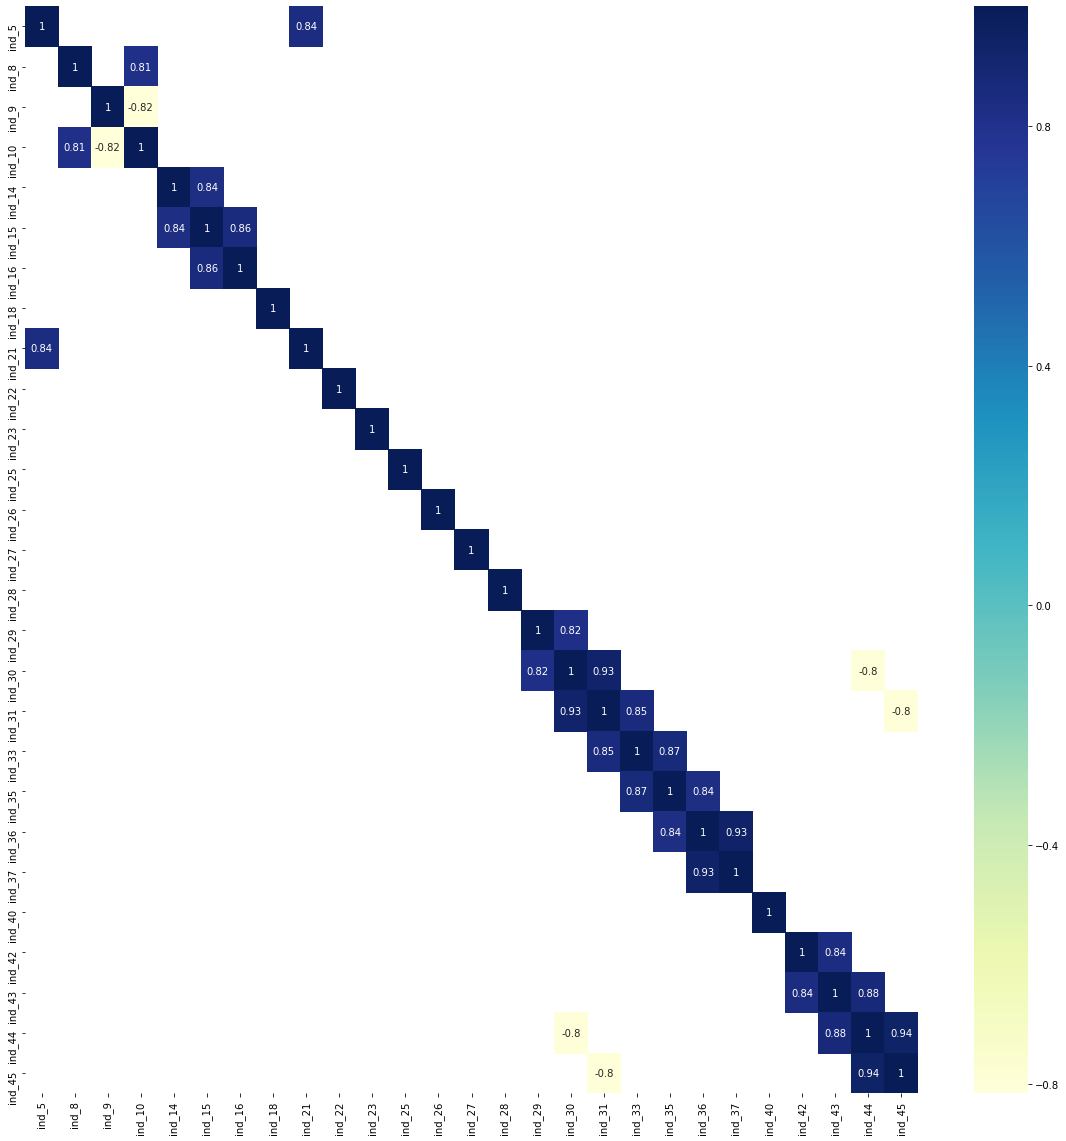

In [54]:
corr = df_corr.iloc[10000:13000,0:27].corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr[corr.abs()>0.8], annot = True,cmap="YlGnBu")
# (value, mortdue) pair seems correlated